In [2]:
# Konfigurasi Spark
import os
import sys

# 1. Mengeset variabel yang menyimpan lokasi di mana Spark diinstal
spark_path = "C:/spark"

# 2. Menentukan environment variable SPARK_HOME
os.environ['SPARK_HOME'] = spark_path

# 3. Simpan lokasi winutils.exe sebagai environment variable HADOOP_HOME
os.environ['HADOOP_HOME'] = spark_path

# 4. Lokasi Python yang dijalankan --> punya Anaconda
#    Apabila Python yang diinstall hanya Anaconda, maka tidak perlu menjalankan baris ini.
os.environ['PYSPARK_PYTHON'] = sys.executable

# 5. Konfigurasi path library PySpark
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

# 6. Import library Spark
#    Dua library yang WAJIB di-import adalah **SparkContext** dan **SparkConf**.
from pyspark import SparkContext
from pyspark import SparkConf

# Setting konfigurasi (opsional)
conf = SparkConf()
conf.set("spark.executor.memory", "2g")
conf.set("spark.cores.max", "4")

sc = SparkContext("local", conf=conf)
#    Apabila berhasil, maka ketika sc di-print akan mengeluarkan nilai <pyspark.context.SparkContext object>
print sc

In [3]:
from pyspark.mllib.fpm import FPGrowth

data = sc.textFile("train.csv")
transactions = data.filter(lambda x:"TRIP" not in x)
transactions = transactions.map(lambda line: line.strip().split(','))
transaksi = transactions.map(lambda line: [line[i] for i in [6,4]])
transaksi = transaksi.filter(lambda x: x[0] == "\"A\"")
transaksi = transaksi.filter(lambda x: x[1] is not None)

In [4]:
# print transaksi.collect()
model = FPGrowth.train(transaksi, minSupport=0.004, numPartitions=10)
result = sorted(model.freqItemsets().collect(),key = lambda x: x.freq, reverse = True)


FreqItemset(items=[u'"20000080"', u'"A"'], freq=10746)
FreqItemset(items=[u'"20000403"', u'"A"'], freq=9238)
FreqItemset(items=[u'"20000066"', u'"A"'], freq=8449)
FreqItemset(items=[u'"20000364"', u'"A"'], freq=7821)
FreqItemset(items=[u'"20000483"', u'"A"'], freq=7729)
FreqItemset(items=[u'"20000129"', u'"A"'], freq=7609)
FreqItemset(items=[u'"20000307"', u'"A"'], freq=7498)
FreqItemset(items=[u'"20000621"', u'"A"'], freq=7276)
FreqItemset(items=[u'"20000089"', u'"A"'], freq=7267)
FreqItemset(items=[u'"20000424"', u'"A"'], freq=7176)
FreqItemset(items=[u'"20000492"', u'"A"'], freq=7171)
FreqItemset(items=[u'"20000529"', u'"A"'], freq=6937)
FreqItemset(items=[u'"20000616"', u'"A"'], freq=6924)


In [27]:
results = []
freq = []
label = []
for fi in result:
    if len(fi.items) == 2:
        results.append(fi)
        freq.append(fi.freq)
        label.append(fi.items[0])
        print fi

FreqItemset(items=[u'"20000080"', u'"A"'], freq=10746)
FreqItemset(items=[u'"20000403"', u'"A"'], freq=9238)
FreqItemset(items=[u'"20000066"', u'"A"'], freq=8449)
FreqItemset(items=[u'"20000364"', u'"A"'], freq=7821)
FreqItemset(items=[u'"20000483"', u'"A"'], freq=7729)
FreqItemset(items=[u'"20000129"', u'"A"'], freq=7609)
FreqItemset(items=[u'"20000307"', u'"A"'], freq=7498)
FreqItemset(items=[u'"20000621"', u'"A"'], freq=7276)
FreqItemset(items=[u'"20000089"', u'"A"'], freq=7267)
FreqItemset(items=[u'"20000424"', u'"A"'], freq=7176)
FreqItemset(items=[u'"20000492"', u'"A"'], freq=7171)
FreqItemset(items=[u'"20000529"', u'"A"'], freq=6937)
FreqItemset(items=[u'"20000616"', u'"A"'], freq=6924)


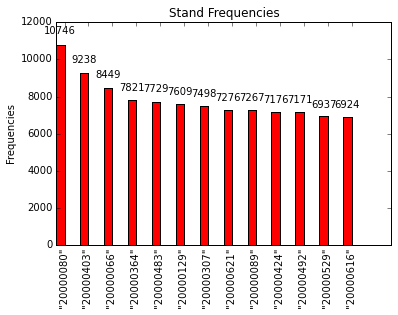

In [39]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

N = len(results)


ind = np.arange(N)  
width = 0.35       

fig, ax = plt.subplots()
rects1 = ax.bar(ind, freq, width,color='r')


ax.set_ylabel('Frequencies')
ax.set_title('Stand Frequencies')
ax.set_xticks(ind + width)
ax.set_xticklabels(label,rotation = 90)



def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
# autolabel(rects2)

plt.show()